jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
import copy
import heapq
import math

In [6]:
df = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/project.csv', sep =';')
nameTable = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/indexStation.csv', sep =';')
outsideParis = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/indexStation_outsideParis.csv', sep =';')

df.head(3)

,Station,Connection,Time
0,0,238,41.0
1,0,159,46.0
2,1,12,36.0


In [7]:
nameTable.head(3)

,indexStation,nameStation,InParis
0,0,Abbesses,1
1,1,Alexandre Dumas,1
2,2,Alma Marceau,1


In [8]:
outsideParis.head(3)

,indexStation,nameStation,InParis
0,10,"Aubervilliers-Pantin, Quatre Chemins",0
1,15,Basilique de Saint-Denis,0
2,25,Billancourt,0


In [9]:
MG = nx.MultiGraph()

In [10]:
for i in range(0, len(df.Station)):
    MG.add_edge(df.Station[i], df.Connection[i], weight=df.Time[i])

In [11]:
MG

In [12]:
print(MG.adj)

{0: {238: {0: {'weight': 41.0}, 1: {'weight': 41.0}}, 159: {0: {'weight': 46.0}, 1: {'weight': 46.0}}}, 238: {0: {0: {'weight': 41.0}, 1: {'weight': 41.0}}, 322: {0: {'weight': 27.0}, 1: {'weight': 27.0}}, 239: {0: {'weight': 120.0}, 1: {'weight': 120.0}}}, 159: {0: {0: {'weight': 46.0}, 1: {'weight': 46.0}}, 147: {0: {'weight': 44.0}, 1: {'weight': 44.0}}}, 1: {12: {0: {'weight': 36.0}, 1: {'weight': 36.0}}, 235: {0: {'weight': 44.0}, 1: {'weight': 44.0}}}, 12: {1: {0: {'weight': 36.0}, 1: {'weight': 36.0}}, 213: {0: {'weight': 42.0}, 1: {'weight': 42.0}}}, 235: {1: {0: {'weight': 44.0}, 1: {'weight': 44.0}}, 284: {0: {'weight': 44.0}, 1: {'weight': 44.0}}}, 2: {110: {0: {'weight': 69.0}, 1: {'weight': 69.0}}, 139: {0: {'weight': 50.0}, 1: {'weight': 50.0}}}, 110: {2: {0: {'weight': 69.0}, 1: {'weight': 69.0}}, 332: {0: {'weight': 37.0}, 1: {'weight': 37.0}}, 109: {0: {'weight': 120.0}, 1: {'weight': 120.0}}}, 139: {2: {0: {'weight': 50.0}, 1: {'weight': 50.0}}, 355: {0: {'weight': 46

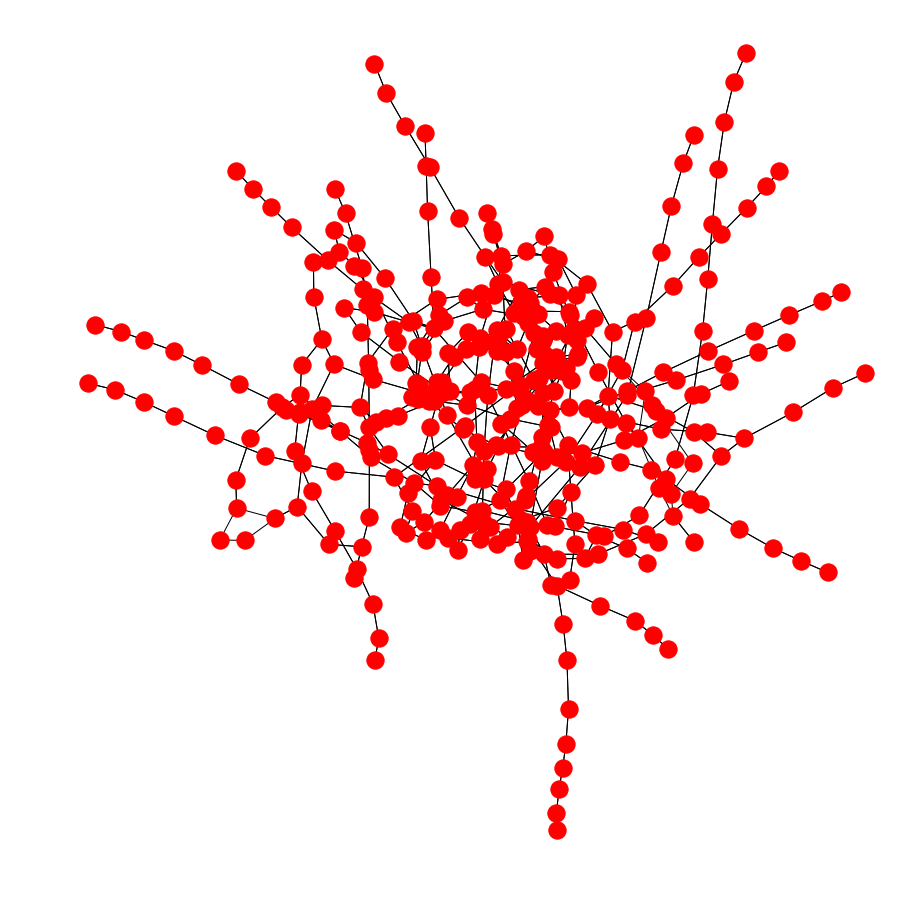

In [13]:

plt.figure(figsize=(12,12))
nx.draw(MG, label=False)

plt.show()

In [14]:
shortestMulti = nx.johnson(MG)

In [15]:
class Chromosome:
    def __init__(self, nodes):
        self.nodes = nodes
        
    
    def shuffleGenes(self):
        random.shuffle(self.nodes)   
    
    #Order Changing Mutation, 1 gene is selected thanks to Pm probability then swapped with the other node(cant duplicate)
    def mutationGene(self, Pm):
        self.Pm = Pm
        for i in range(0, len(self.nodes)):
            self.randMutate = random.random()
            if self.randMutate < self.Pm:
                self.mutateTo = random.randint(0,len(self.nodes)-1)
                self.tmpGene = copy.copy(self.nodes[i])
                self.nodes = np.where(self.nodes == self.mutateTo, self.tmpGene, self.nodes)
                self.nodes[i] = self.mutateTo

    def pathWay(self, Multigraph): #Multigraph come from the Johnson Networkx calculation for shortest path between 2 nodes
        self.Multigraph = Multigraph
        self.totalPath = []
        for i in range(0, len(self.nodes)-1):        
            if i+1 is not None:
                self.totalPath = merge(self.totalPath, self.Multigraph[self.nodes[i]][self.nodes[i+1]])   
        return self.totalPath
        
    def __repr__(self):
        self.strNodes = "Chromosome :"
        for i in self.nodes:
            self.node = str(i)
            self.strNodes = self.strNodes + "|" + self.node
        self.strNodes = self.strNodes + "|"
        return self.strNodes

In [16]:
#Crossover PErmutation Encoding (1)ABC DEF + (2)DAB CFE --> ABC(1) DFE (in the order of the 2d chromosome genes)
def crossoverPermutation(chromo1, chromo2):
    lenChromo = int(len(chromo1.nodes) / 2)
    childrenChr = chromo1.nodes[0:lenChromo]
    for i in chromo2.nodes:
        if i not in childrenChr:
            childrenChr = np.append(childrenChr, [i])
    return childrenChr
    

In [17]:
#Crossover PErmutation Encoding (1)ABC DEF + (2)DAB CFE --> ABC(1) DFE (in the order of the 2d chromosome genes)
def crossoverSinglePoint(chromo1, chromo2):
    lenChromo = int(len(chromo1.nodes) / 2)
    childrenChr = np.append(chromo1.nodes[0:lenChromo], chromo2.nodes[lenChromo:len(chromo1.nodes)])
    return childrenChr
    

In [19]:
def populationGenerationStart(popsize, nodeList, start):
    populationOpti = np.array([])
    for i in range(0,popsize,1):
        nodeList = np.unique(nodeList, axis=0)
        random.shuffle(nodeList)
        nodeList = np.where(nodeList == start, nodeList[0], nodeList)
        nodeList[0] = start
        populationOpti = np.append(populationOpti, Chromosome(nodeList))
    return populationOpti

In [20]:
def populationGenerationClassic(popsize, nodeList):
    populationOpti = []
    for i in range(0,popsize,1):
        nodeList = np.unique(nodeList, axis=0)
        random.shuffle(nodeList)
        populationOpti = populationOpti + [Chromosome()]
    return populationOpti

In [21]:
#function can merge 2 list where last element of one(a) is the first element of the second(b)
#for example [1,2,3,4] + [4,5,6] = [1,2,3,4,5,6]
def merge(a, b):
    c = a[:-1] + b[:]
    return c
    

In [138]:
def NewNameFit2(uniqueNodeName, chromosome, MultiG, outsideNodes):
    if len(chromosome.pathWay(MultiG)) < 1000:
        NameList = np.array([])
        for i in chromosome.pathWay(MultiG):
            if i not in outsideNodes:
                NameList = np.append(NameList, uniqueNodeName[i])
                fitScore = len(np.unique(NameList)) / 251
            else:
                fitScore = 0
    else:
        fitScore = 0
    return fitScore

In [154]:
#NEW ALGO split avec duplicate CROSSOVER SINGLE POINT
#MAIN LOOP
population = np.array([])
startGene = 268
X_opti = np.array([])
Y_opti = np.array([])

for i in range(0, 100):
    tmpNode = np.random.randint(375, size = (30))
    tmpNode[0] = startGene
    tmpC = Chromosome(tmpNode)
    population = np.append(population, tmpC)
    
for z in range(0,10000):
    fitList = np.array([])
    for i in range(0,len(population)):
        fitList = np.append(fitList, NewNameFit2(nameTable.nameStation, population[i], shortestMulti, outsideParis.indexStation))
    IndexfitBest = heapq.nlargest(10, range(len(fitList)), fitList.take)
    population_best = np.take(population, IndexfitBest)
    child = np.array([population_best[0], population_best[1]]) #2 best chromosomes kept
    for u in range(1, len(population_best)):
        crossChr1 = Chromosome(crossoverSinglePoint(population_best[u-1], population_best[u]))
        crossChr2 = Chromosome(crossoverSinglePoint(population_best[u], population_best[u-1]))
        child = np.append(child, crossChr1)
        child = np.append(child, crossChr2)
    population = child
    for mutIter in range(0, len(population)-1):
        rand = random.random()
        if rand < 0.3:
            population[mutIter].mutationGene(0.1)
   # bestChromoIter = population[1]
   # newPopulation = np.append(newPopulation,bestChromoIter)
    print(np.max(fitList))
    X_opti = np.append(X_opti, z)
    Y_opti = np.append(Y_opti, np.max(fitList))
    print('Iteration {}:'.format(z, fitList))

print(population)


0.7370517928286853
Iteration 0:
0.7290836653386454
Iteration 1:
0.7529880478087649
Iteration 2:
0.7529880478087649
Iteration 3:
0.7529880478087649
Iteration 4:
0.7569721115537849
Iteration 5:
0.7609561752988048
Iteration 6:
0.7848605577689243
Iteration 7:
0.8047808764940239
Iteration 8:
0.7928286852589641
Iteration 9:
0.7928286852589641
Iteration 10:
0.7928286852589641
Iteration 11:
0.7928286852589641
Iteration 12:
0.7928286852589641
Iteration 13:
0.7928286852589641
Iteration 14:
0.8047808764940239
Iteration 15:
0.8047808764940239
Iteration 16:
0.8047808764940239
Iteration 17:
0.8247011952191236
Iteration 18:
0.8326693227091634
Iteration 19:
0.8366533864541833
Iteration 20:
0.8366533864541833
Iteration 21:
0.8366533864541833
Iteration 22:
0.8326693227091634
Iteration 23:
0.8326693227091634
Iteration 24:
0.8326693227091634
Iteration 25:
0.8565737051792829
Iteration 26:
0.8565737051792829
Iteration 27:
0.8565737051792829
Iteration 28:
0.8565737051792829
Iteration 29:
0.8565737051792829
I

0.9083665338645418
Iteration 245:
0.9083665338645418
Iteration 246:
0.9083665338645418
Iteration 247:
0.9083665338645418
Iteration 248:
0.9083665338645418
Iteration 249:
0.9083665338645418
Iteration 250:
0.9083665338645418
Iteration 251:
0.9083665338645418
Iteration 252:
0.9083665338645418
Iteration 253:
0.9083665338645418
Iteration 254:
0.9083665338645418
Iteration 255:
0.9083665338645418
Iteration 256:
0.9083665338645418
Iteration 257:
0.9083665338645418
Iteration 258:
0.9083665338645418
Iteration 259:
0.9083665338645418
Iteration 260:
0.9083665338645418
Iteration 261:
0.9083665338645418
Iteration 262:
0.9083665338645418
Iteration 263:
0.9083665338645418
Iteration 264:
0.9083665338645418
Iteration 265:
0.9083665338645418
Iteration 266:
0.9083665338645418
Iteration 267:
0.9083665338645418
Iteration 268:
0.9083665338645418
Iteration 269:
0.9083665338645418
Iteration 270:
0.9083665338645418
Iteration 271:
0.9083665338645418
Iteration 272:
0.9083665338645418
Iteration 273:
0.908366533864

0.9083665338645418
Iteration 486:
0.9083665338645418
Iteration 487:
0.9083665338645418
Iteration 488:
0.9083665338645418
Iteration 489:
0.9083665338645418
Iteration 490:
0.9083665338645418
Iteration 491:
0.9083665338645418
Iteration 492:
0.9083665338645418
Iteration 493:
0.9083665338645418
Iteration 494:
0.9083665338645418
Iteration 495:
0.9083665338645418
Iteration 496:
0.9083665338645418
Iteration 497:
0.9083665338645418
Iteration 498:
0.9083665338645418
Iteration 499:
0.9083665338645418
Iteration 500:
0.9083665338645418
Iteration 501:
0.9083665338645418
Iteration 502:
0.9083665338645418
Iteration 503:
0.9083665338645418
Iteration 504:
0.9083665338645418
Iteration 505:
0.9083665338645418
Iteration 506:
0.9083665338645418
Iteration 507:
0.9083665338645418
Iteration 508:
0.9083665338645418
Iteration 509:
0.9083665338645418
Iteration 510:
0.9083665338645418
Iteration 511:
0.9083665338645418
Iteration 512:
0.9083665338645418
Iteration 513:
0.9083665338645418
Iteration 514:
0.908366533864

0.9083665338645418
Iteration 727:
0.9083665338645418
Iteration 728:
0.9083665338645418
Iteration 729:
0.9083665338645418
Iteration 730:
0.9083665338645418
Iteration 731:
0.9083665338645418
Iteration 732:
0.9083665338645418
Iteration 733:
0.9083665338645418
Iteration 734:
0.9083665338645418
Iteration 735:
0.9083665338645418
Iteration 736:
0.9083665338645418
Iteration 737:
0.9083665338645418
Iteration 738:
0.9083665338645418
Iteration 739:
0.9083665338645418
Iteration 740:
0.9083665338645418
Iteration 741:
0.9083665338645418
Iteration 742:
0.9083665338645418
Iteration 743:
0.9083665338645418
Iteration 744:
0.9083665338645418
Iteration 745:
0.9083665338645418
Iteration 746:
0.9083665338645418
Iteration 747:
0.9083665338645418
Iteration 748:
0.9083665338645418
Iteration 749:
0.9083665338645418
Iteration 750:
0.9083665338645418
Iteration 751:
0.9083665338645418
Iteration 752:
0.9083665338645418
Iteration 753:
0.9083665338645418
Iteration 754:
0.9083665338645418
Iteration 755:
0.908366533864

KeyboardInterrupt: 

In [ ]:
X_opti

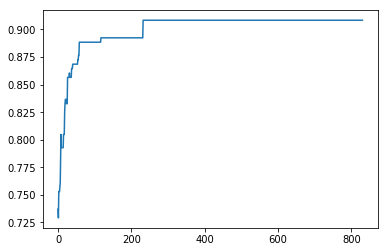

In [155]:
plt.plot(X_opti, Y_opti)
plt.show()

In [146]:
len(population[4].pathWay(shortestMulti))

544

In [147]:
NewNameFit2(nameTable.nameStation, population[4], shortestMulti, outsideParis.indexStation)

0.8764940239043825

In [148]:
len(population[4].pathWay(shortestMulti))

544

In [149]:
np.sort(np.unique(population[4].pathWay(shortestMulti)))

array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  40,
        41,  44,  45,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  68,  69,  70,
        71,  73,  74,  75,  77,  78,  82,  83,  84,  85,  86,  87,  92,
        93,  94,  96,  97,  98,  99, 100, 101, 103, 104, 105, 106, 107,
       109, 110, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137,
       139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153,
       154, 155, 157, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169,
       170, 171, 173, 174, 175, 180, 182, 184, 187, 188, 189, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 21

In [128]:
13 * 25 + 1

326